``Importing``

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

``load data``

In [2]:
df=pd.read_csv('financial_loan.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [4]:
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


``Some Cleans ``

``Fix Emp_Length``

In [5]:
def clean_emp_length(val):
    if pd.isnull(val):
        return None
    elif "< 1" in val:
        return 0
    elif "10+" in val:
        return 10
    else:
        digits = ''.join(filter(str.isdigit, val))
        return int(digits) if digits else None


df['emp_length'] = df['emp_length'].apply(clean_emp_length)


``Fix term``

In [6]:
df['term']=df['term'].str.replace('months',' ').astype(int)

``Change some columns type ``

In [7]:
df['issue_date']= pd.to_datetime(df['issue_date'],dayfirst=True)

In [8]:
df['last_credit_pull_date']= pd.to_datetime(df['last_credit_pull_date'],dayfirst=True)

In [9]:
df['last_payment_date']= pd.to_datetime(df['last_payment_date'],dayfirst=True)

In [10]:
df['next_payment_date']= pd.to_datetime(df['next_payment_date'],dayfirst=True)

``Export data``

In [11]:
df.to_csv('bank data.csv',index=False)

`` ML ``

In [12]:
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,0,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,0,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,0,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


In [15]:
# drop some unimportant column 

In [16]:
df = df.drop(columns=[
    'id', 'member_id', 'emp_title',
    'last_payment_date', 'next_payment_date', 'last_credit_pull_date',
    'total_payment'
], errors='ignore')

In [20]:
df.dropna(inplace=True)

In [21]:
# convert loan statues cloumn to int  to be target column

In [17]:
df['loan_status'] = df['loan_status'].map({
    'Fully Paid': 0,
    'Charged Off': 1
})

In [24]:
df = df[df['loan_status'].isin([0, 1])]

In [ ]:
#Processing dates

In [26]:
df['issue_date'] = pd.to_datetime(df['issue_date'], errors='coerce')
df['issue_year'] = df['issue_date'].dt.year
df['issue_month'] = df['issue_date'].dt.month
df.drop(columns=['issue_date'], inplace=True)

In [27]:
# Label Encoding
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [28]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

`` Traning ``

In [44]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

`` Evaluation ``

In [45]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  

In [46]:
print(" Model Accuracy:", accuracy_score(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))


 Model Accuracy: 0.8532550693703308
 Confusion Matrix:
 [[6363   37]
 [1063   33]]
 Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      6400
         1.0       0.47      0.03      0.06      1096

    accuracy                           0.85      7496
   macro avg       0.66      0.51      0.49      7496
weighted avg       0.80      0.85      0.79      7496



In [37]:
# some predictions with probability percentage
results = X_test.copy()
results['actual'] = y_test
results['predicted'] = y_pred
results['probability_of_default'] = y_proba

print(results[['predicted', 'probability_of_default']].head(10))


       predicted  probability_of_default
16862        0.0                    0.07
32570        0.0                    0.09
35725        0.0                    0.12
10909        0.0                    0.15
17947        0.0                    0.15
3885         0.0                    0.15
2917         0.0                    0.07
2742         0.0                    0.00
13490        0.0                    0.14
32387        0.0                    0.12


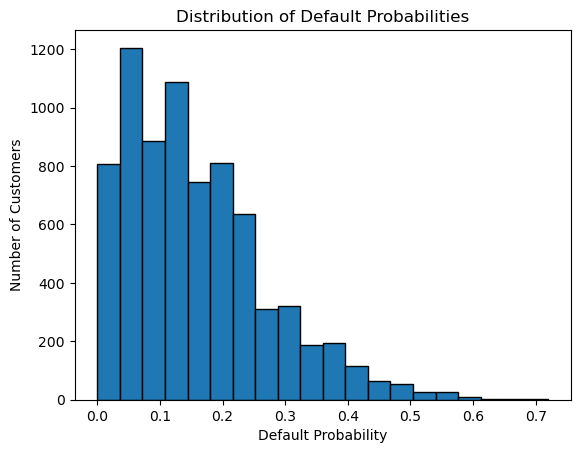

In [40]:
plt.hist(y_proba, bins=20, edgecolor='black')
plt.title("Distribution of Default Probabilities")
plt.xlabel("Default Probability")
plt.ylabel("Number of Customers")

plt.show()
